<h1 align = 'center'> MultiClass Classification using Supervised Classification Algorithms

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.naive_bayes import GaussianNB  
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
#Reading the dataset csv file as Pandas DataFrame
d = pd.read_csv("dataset_1.csv")
d

,Id,Feature_1,Feature_2,Feature_3,Feature_4,target
0,1,5.1,3.5,1.4,0.2,Class_1
1,2,4.9,3.0,1.4,0.2,Class_1
2,3,4.7,3.2,1.3,0.2,Class_1
3,4,4.6,3.1,1.5,0.2,Class_1
4,5,5.0,3.6,1.4,0.2,Class_1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Class_3
146,147,6.3,2.5,5.0,1.9,Class_3
147,148,6.5,3.0,5.2,2.0,Class_3
148,149,6.2,3.4,5.4,2.3,Class_3


In [3]:
#Checking the dimensions of the data frame
d.shape

(150, 6)

In [4]:
#Checking for missing values, and dispalying only those columns with missing values
d.isnull().sum()

Id           0
Feature_1    0
Feature_2    0
Feature_3    0
Feature_4    0
target       0
dtype: int64

In [5]:
# Reassuring all entries are Non-Null and checking data types of all columns
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         150 non-null    int64  
 1   Feature_1  150 non-null    float64
 2   Feature_2  150 non-null    float64
 3   Feature_3  150 non-null    float64
 4   Feature_4  150 non-null    float64
 5   target     150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<b> No missing values found in any of the columns and all Features (independent variables) are cotinuous numeric variables. 

In [6]:
# setting id as index
d = d.set_index("Id")
d

,Feature_1,Feature_2,Feature_3,Feature_4,target
Id,,,,,
1,5.1,3.5,1.4,0.2,Class_1
2,4.9,3.0,1.4,0.2,Class_1
3,4.7,3.2,1.3,0.2,Class_1
4,4.6,3.1,1.5,0.2,Class_1
5,5.0,3.6,1.4,0.2,Class_1
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Class_3
147,6.3,2.5,5.0,1.9,Class_3
148,6.5,3.0,5.2,2.0,Class_3


In [7]:
#checking the summary and trend of columns in data frame
d.describe()

,Feature_1,Feature_2,Feature_3,Feature_4
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<h3> Univariate analysis

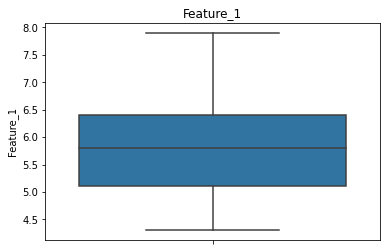

In [8]:
plt.title("Feature_1")
sns.boxplot(y=d.Feature_1)
plt.show()

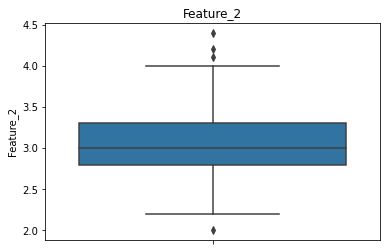

In [9]:
plt.title("Feature_2")
sns.boxplot(y=d.Feature_2)
plt.show()

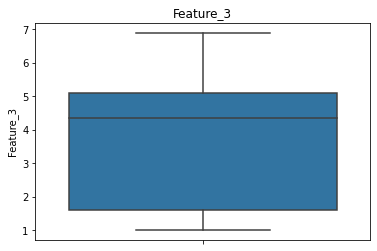

In [10]:
plt.title("Feature_3")
sns.boxplot(y=d.Feature_3)
plt.show()

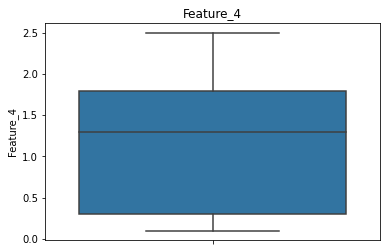

In [11]:
plt.title("Feature_4")
sns.boxplot(y=d.Feature_4)
plt.show()

Only Feature_2 has a few outliers, which are not significant enough to be removed from the data. Hence, no outlier removal required

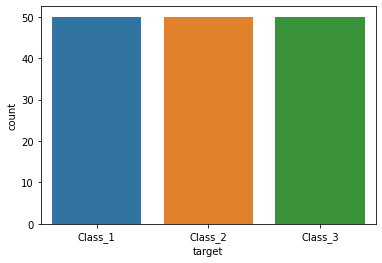

In [12]:
sns.countplot(d.target)

All classes are similary ditributed in the target variable and hence no need include class imbalnce factor while crating the ML model. Checking the correlation between continuous variables before proceeding with further analysis.

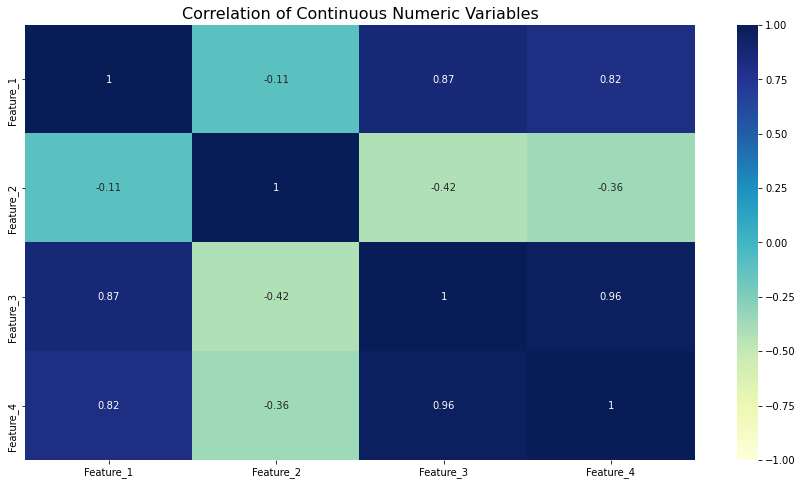

In [13]:
corr_feature = ["Feature_1","Feature_2","Feature_3","Feature_4"]
d_corr = d[corr_feature].corr()
plt.figure(figsize=(15,8))
sns.heatmap(d_corr,vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")
plt.title("Correlation of Continuous Numeric Variables", fontsize = 16)
plt.show()

While Features 1,3 and 4 seems to be stongly positively correlated, Feature 2 is weakly negatively correlated with all the other 3 variables. This can be elucidated further in bivariate analysis using scatter plots.

<h3> Bivariate analysis

In [14]:
# function to plot scatter plot for two features
def plotScatter(x, y):
    sns.scatterplot(x=x, y=y, data=d)
    plt.title("Scatter plot between "+x+" and "+y+"")
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()

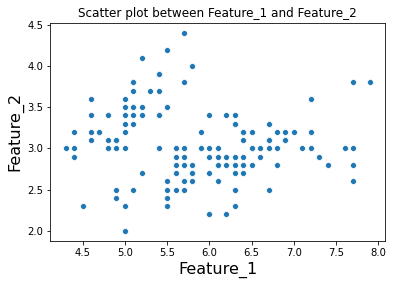

In [15]:
plotScatter("Feature_1", "Feature_2")

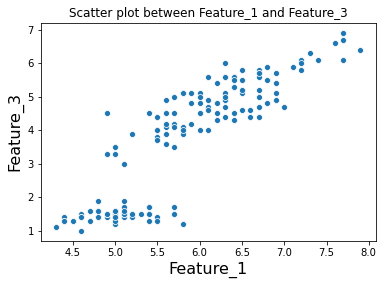

In [16]:
plotScatter("Feature_1", "Feature_3")

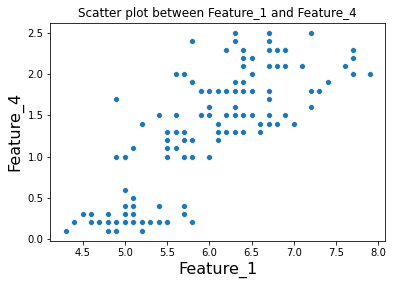

In [17]:
plotScatter("Feature_1", "Feature_4")

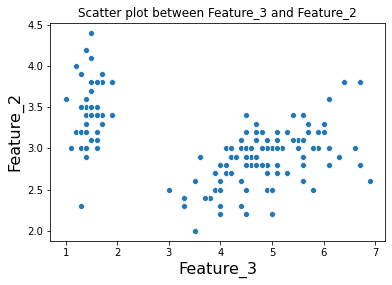

In [18]:
plotScatter("Feature_3", "Feature_2")

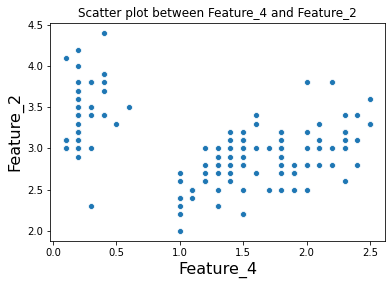

In [19]:
plotScatter("Feature_4", "Feature_2")

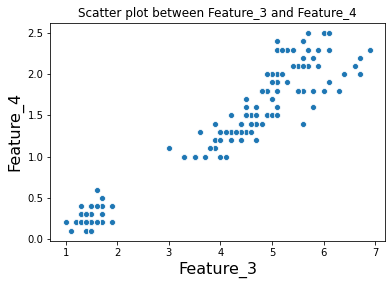

In [20]:
plotScatter("Feature_3", "Feature_4")

Checking Influence of each feature on the target variable

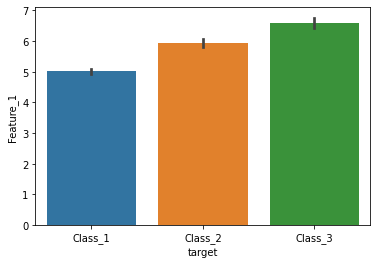

In [21]:
sns.barplot(x = "target", y = "Feature_1", data = d)
plt.show()

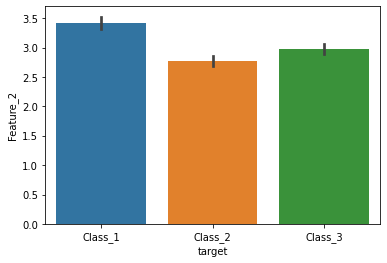

In [22]:
sns.barplot(x = "target", y = "Feature_2", data = d)
plt.show()

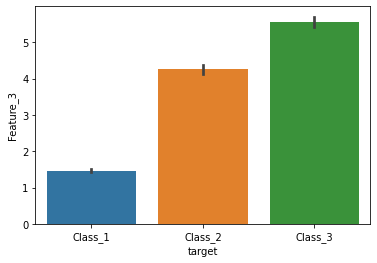

In [23]:
sns.barplot(x = "target", y = "Feature_3", data = d)
plt.show()

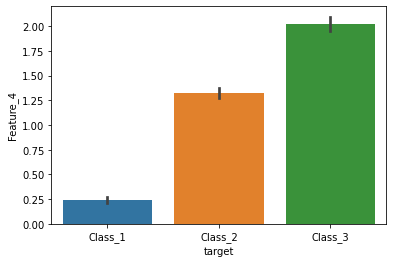

In [24]:
sns.barplot(x = "target", y = "Feature_4", data = d)
plt.show()

<h3> Train-Test Data Creation </h3>

Need to split the dataset into Train and Test datasets using 80/20 split in order to train and test ML models. To split the whole dataset into two, the train_test_split functionaluty from sklearn library can be used, wherein the Train data will be used to build the model and test data to evaluate the performance of the model.

In [25]:
x = d[["Feature_1", "Feature_2","Feature_3","Feature_4"]] #independent variables
y = d.target #dependent variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


<h3> Bulding Classification Models </h3>

Using different supervised ML classification algorithoms on training data set classification models are build and the performance is validated using test data set.

<h4> Linear SVC </h4>

The Linear Support Vector Classifier (L SVC) method applies a linear kernel function to perform classification and it performs well with a large number of samples. If we compare it with the SVC model, the Linear SVC has additional parameters such as penalty normalization which applies 'L1' or 'L2' and loss function. The kernel method can not be changed in linear SVC, because it is based on the kernel linear method. 

In [26]:
#Building Model
svc = LinearSVC()
svc.fit(x_train, y_train)

y_pred_train = svc.predict(x_train)
y_pred = svc.predict(x_test)

error_train = zero_one_loss(y_train, y_pred_train)
error = zero_one_loss(y_test, y_pred)

train_svc = confusion_matrix(y_train, y_pred_train)
results_svc = confusion_matrix(y_test, y_pred)

print("Confusion Matrix of Train dataset: \n", train_svc)
print("\n Accuracy on train dataset:", accuracy_score(y_train, y_pred_train))
print("\n Error in Train dataset: ", error_train)
print("\n Model Performance in Train dataset: \n",classification_report(y_train, y_pred_train))

print("\n Confusion Matrix of Test dataset: \n", results_svc)
print("\n Accuracy on Test dataset: ", accuracy_score(y_pred, y_test))
print("\n Error in Test dataset: ", error)
print("\n Model Performance in Test dataset: \n",classification_report(y_test, y_pred))

Confusion Matrix of Train dataset: 
 [[39  0  0]
 [ 0 38  2]
 [ 0  2 39]]

 Accuracy on train dataset: 0.9666666666666667

 Error in Train dataset:  0.033333333333333326

 Model Performance in Train dataset: 
               precision    recall  f1-score   support

     Class_1       1.00      1.00      1.00        39
     Class_2       0.95      0.95      0.95        40
     Class_3       0.95      0.95      0.95        41

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120


 Confusion Matrix of Test dataset: 
 [[11  0  0]
 [ 0  7  3]
 [ 0  0  9]]

 Accuracy on Test dataset:  0.9

 Error in Test dataset:  0.09999999999999998

 Model Performance in Test dataset: 
               precision    recall  f1-score   support

     Class_1       1.00      1.00      1.00        11
     Class_2       1.00      0.70      0.82        10
     Class_3       0.75      1.00      0.86         9

<h4> KNN </h4>

K-Nearest Neighbours algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories. It stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm. K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.
It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset. KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.

In [28]:
#Building Model
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred_train = knn.predict(x_train)
y_pred = knn.predict(x_test)

error_train = zero_one_loss(y_train, y_pred_train)
error = zero_one_loss(y_test, y_pred)

train_knn = confusion_matrix(y_train, y_pred_train)
results_knn = confusion_matrix(y_test, y_pred)

print("Confusion Matrix of Train dataset: \n", train_knn)
print("\n Accuracy on train dataset:", accuracy_score(y_train, y_pred_train))
print("\n Error in Train dataset: ", error_train)
print("\n Model Performance in Train dataset: \n",classification_report(y_train, y_pred_train))

print("\n Confusion Matrix of Test dataset: \n", results_knn)
print("\n Accuracy on Test dataset: ", accuracy_score(y_pred, y_test))
print("\n Error in Test dataset: ", error)
print("\n Model Performance in Test dataset: \n",classification_report(y_test, y_pred))

Confusion Matrix of Train dataset: 
 [[39  0  0]
 [ 0 38  2]
 [ 0  2 39]]

 Accuracy on train dataset: 0.9666666666666667

 Error in Train dataset:  0.033333333333333326

 Model Performance in Train dataset: 
               precision    recall  f1-score   support

     Class_1       1.00      1.00      1.00        39
     Class_2       0.95      0.95      0.95        40
     Class_3       0.95      0.95      0.95        41

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120


 Confusion Matrix of Test dataset: 
 [[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]

 Accuracy on Test dataset:  0.9666666666666667

 Error in Test dataset:  0.033333333333333326

 Model Performance in Test dataset: 
               precision    recall  f1-score   support

     Class_1       1.00      1.00      1.00        11
     Class_2       1.00      0.90      0.95        10
     Class_3       0.90      1.00    

<h4> NB </h4>

Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems. It is mainly used in text classification that includes a high-dimensional training dataset. It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.

In [29]:
#Building Model
nb = GaussianNB()
nb.fit(x_train, y_train)

y_pred_train = nb.predict(x_train)
y_pred = nb.predict(x_test)

error_train = zero_one_loss(y_train, y_pred_train)
error = zero_one_loss(y_test, y_pred)

train_nb = confusion_matrix(y_train, y_pred_train)
results_nb = confusion_matrix(y_test, y_pred)

print("Confusion Matrix of Train dataset: \n", train_nb)
print("\n Accuracy on train dataset:", accuracy_score(y_train, y_pred_train))
print("\n Error in Train dataset: ", error_train)
print("\n Model Performance in Train dataset: \n",classification_report(y_train, y_pred_train))

print("\n Confusion Matrix of Test dataset: \n", results_nb)
print("\n Accuracy on Test dataset: ", accuracy_score(y_pred, y_test))
print("\n Error in Test dataset: ", error)
print("\n Model Performance in Test dataset: \n",classification_report(y_test, y_pred))

Confusion Matrix of Train dataset: 
 [[39  0  0]
 [ 0 38  2]
 [ 0  3 38]]

 Accuracy on train dataset: 0.9583333333333334

 Error in Train dataset:  0.04166666666666663

 Model Performance in Train dataset: 
               precision    recall  f1-score   support

     Class_1       1.00      1.00      1.00        39
     Class_2       0.93      0.95      0.94        40
     Class_3       0.95      0.93      0.94        41

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120


 Confusion Matrix of Test dataset: 
 [[11  0  0]
 [ 0  8  2]
 [ 0  0  9]]

 Accuracy on Test dataset:  0.9333333333333333

 Error in Test dataset:  0.06666666666666665

 Model Performance in Test dataset: 
               precision    recall  f1-score   support

     Class_1       1.00      1.00      1.00        11
     Class_2       1.00      0.80      0.89        10
     Class_3       0.82      1.00      

<h4> LR </h4>

Logistic Regression classifier is a predictive analysis algorithm based on the concept of probability. It can only be used when the target variables are discrete/categorical. When using logistic regression, a threshold must be specified based on which the algorithm can decide whether to put a value into one class or the other.Logistic Regression is actually a Linear Regression model with more complex cost function, known as the ‘Sigmoid function’.The objective of the algorithm is to minimize the cost function so that accuracy will be maximized. To minimize the cost function, a gradient descent function is run on each parameter.

In [30]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_train = lr.predict(x_train)
y_pred = lr.predict(x_test)

error_train = zero_one_loss(y_train, y_pred_train)
error = zero_one_loss(y_test, y_pred)

train_lr = confusion_matrix(y_train, y_pred_train)
results_lr = confusion_matrix(y_test, y_pred)

print("Confusion Matrix of Train dataset: \n", train_lr)
print("\n Accuracy on train dataset:", accuracy_score(y_train, y_pred_train))
print("\n Error in Train dataset: ", error_train)
print("\n Model Performance in Train dataset: \n",classification_report(y_train, y_pred_train))

print("\n Confusion Matrix of Test dataset: \n", results_lr)
print("\n Accuracy on Test dataset: ", accuracy_score(y_pred, y_test))
print("\n Error in Test dataset: ", error)
print("\n Model Performance in Test dataset: \n",classification_report(y_test, y_pred))

Confusion Matrix of Train dataset: 
 [[39  0  0]
 [ 0 39  1]
 [ 0  0 41]]

 Accuracy on train dataset: 0.9916666666666667

 Error in Train dataset:  0.008333333333333304

 Model Performance in Train dataset: 
               precision    recall  f1-score   support

     Class_1       1.00      1.00      1.00        39
     Class_2       1.00      0.97      0.99        40
     Class_3       0.98      1.00      0.99        41

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120


 Confusion Matrix of Test dataset: 
 [[11  0  0]
 [ 0  8  2]
 [ 0  0  9]]

 Accuracy on Test dataset:  0.9333333333333333

 Error in Test dataset:  0.06666666666666665

 Model Performance in Test dataset: 
               precision    recall  f1-score   support

     Class_1       1.00      1.00      1.00        11
     Class_2       1.00      0.80      0.89        10
     Class_3       0.82      1.00     

<h4> MLP </h4>

Multiple Linear Regression is a commonly used artificial neural network built out of artificial neurons. An artificial neuron simple computational unit that weigh input signals and produce an output signal utilizing an activation function.An MLP learns to model the correlation of input-output pairs by changing the connection weights after each packet of data is processed and compares the amount of error in the output to the expected result.This supervised learning is carried out through backpropagation which is a generalization of the least mean squares algorithm in the linear perceptron, and trains by adjusting the parameters, weights and biases of the model to minimize the error.

In [31]:
mlp = MLPClassifier(random_state=3)
mlp.fit(x_train, y_train)
y_pred_train = mlp.predict(x_train)
y_pred = mlp.predict(x_test)

error_train = zero_one_loss(y_train, y_pred_train)
error = zero_one_loss(y_test, y_pred)

train_mlp = confusion_matrix(y_train, y_pred_train)
results_mlp = confusion_matrix(y_test, y_pred)

print("Confusion Matrix of Train dataset: \n", train_mlp)
print("\n Accuracy on train dataset:", accuracy_score(y_train, y_pred_train))
print("\n Error in Train dataset: ", error_train)
print("\n Model Performance in Train dataset: \n",classification_report(y_train, y_pred_train))

print("\n Confusion Matrix of Test dataset: \n", results_mlp)
print("\n Accuracy on Test dataset: ", accuracy_score(y_pred, y_test))
print("\n Error in Test dataset: ", error)
print("\n Model Performance in Test dataset: \n",classification_report(y_test, y_pred))

Confusion Matrix of Train dataset: 
 [[39  0  0]
 [ 0 37  3]
 [ 0  0 41]]

 Accuracy on train dataset: 0.975

 Error in Train dataset:  0.025000000000000022

 Model Performance in Train dataset: 
               precision    recall  f1-score   support

     Class_1       1.00      1.00      1.00        39
     Class_2       1.00      0.93      0.96        40
     Class_3       0.93      1.00      0.96        41

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.98       120
weighted avg       0.98      0.97      0.97       120


 Confusion Matrix of Test dataset: 
 [[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]

 Accuracy on Test dataset:  0.9666666666666667

 Error in Test dataset:  0.033333333333333326

 Model Performance in Test dataset: 
               precision    recall  f1-score   support

     Class_1       1.00      1.00      1.00        11
     Class_2       1.00      0.90      0.95        10
     Class_3       0.90      1.00      0.95       